### First we import the csv file and print the head of the dataframe

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
# pd.options.display.width = 0
from IPython.display import display, HTML
# display(HTML("<style>.jp-Cell { width: 200% !important; }</style>"))

# Dataset from Brian Rock was downloaded February 2025 from https://www.kaggle.com/datasets/runningwithrock/2023-marathon-results?select=Results.csv
# Dataset Creative Commons license Attribution 4.0 International

df = pd.read_csv('Results.csv')
print(df.head()) 


             Name                     Race  Year Gender  Age  Finish  \
0   Arunas Jurkus  Salt Lake City Marathon  2023      M   55   12907   
1       Seth Reed  Salt Lake City Marathon  2023      M   24   12921   
2  Mufaro Chivasa  Salt Lake City Marathon  2023      M   54   12948   
3     Adam Cheney  Salt Lake City Marathon  2023      M   22   12954   
4   Michael Pyles  Salt Lake City Marathon  2023      M   33   12964   

  Age Bracket  
0       55-59  
1    Under 35  
2       50-54  
3    Under 35  
4    Under 35  


### Then we plot a distribution of marathon finish times by gender

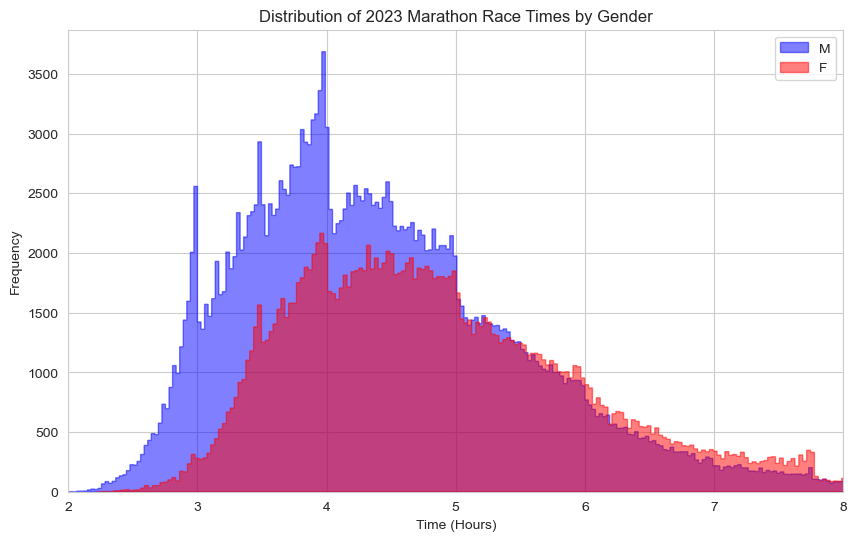

In [21]:
# Convert 'Result_hr' to timedelta
#df['Result_hr'] = pd.to_timedelta(df['Result_hr'])

# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600

# Plot the distribution of race times by gender
plt.figure(figsize=(10, 6))

for gender, color in zip(['M', 'F'], ['blue', 'red']):
    gender_data = df[df['Gender'] == gender]['Result_hr_numeric']
    plt.hist(gender_data, bins=500, alpha=0.5, color=color, label=gender, edgecolor=color, histtype="stepfilled")

plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of 2023 Marathon Race Times by Gender')

plt.legend()
plt.grid(True)
plt.xlim(2, 8)
plt.show()

### Can we also show a line instead of the histogram bars? Yes with a kernel density estimation (KDE) plot:

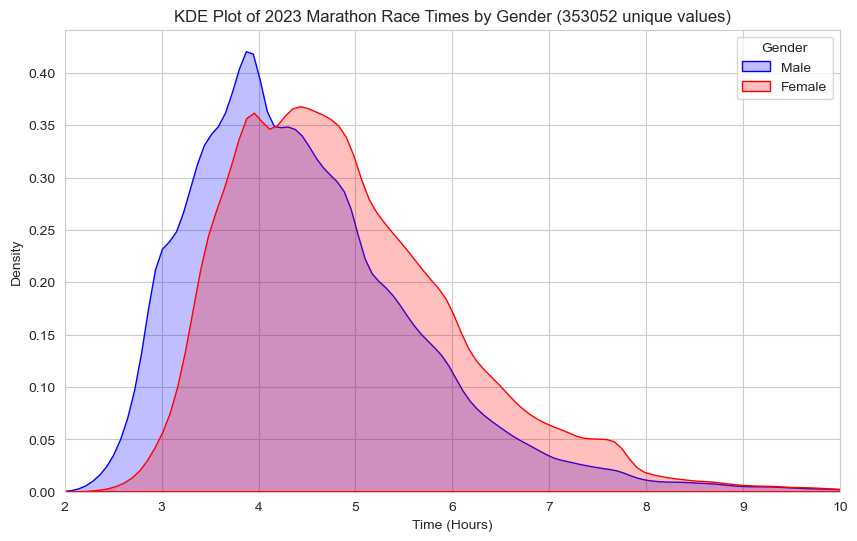

In [4]:
# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of 2023 Marathon Race Times by Gender (353052 unique values)')

plt.legend(title='Gender')
plt.xlim(2, 10)
plt.show()

### Same plot without axis limits (gender difference is only about 1/30th of total range)

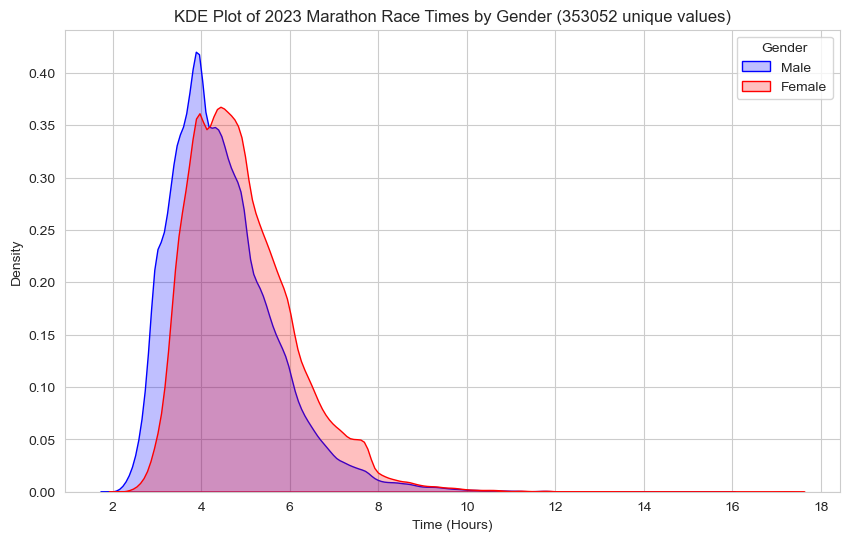

In [5]:
# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of 2023 Marathon Race Times by Gender (353052 unique values)')

plt.legend(title='Gender')
# plt.xlim(2, 10)
plt.show()